In [1]:
import pandas as pd  #Imported necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [2]:
games = pd.read_csv('/datasets/games.csv')
games.info()
games.head() # Take a peak into our data.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
games.columns = [i.lower() for i in games.columns] # using for loop to lowercase each columns in the dataframe
# task - convert release years to int. Done
# task - convert user score to float Done
# task - convert critic score to int
# before that I will take a look if there is any missing values

games.dropna(subset=['year_of_release'], inplace=True) # Missing values have been removed on release year column
games['year_of_release'].isna().sum() #verified.
games['year_of_release'] = games['year_of_release'].astype(int) #column converted to integer.

games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games['user_score'].fillna(games['user_score'].mean(), inplace=True)
games['user_score'] = round(games['user_score'], 2)
games['user_score'] = games['user_score'].astype(float) 
# For user_score column, instead of removing NAN values, we filled with mean values because there was over 200 missing values
#Dropping those rows might affect our sale reports.

games['critic_score'].isna().sum() # there are 8463 NaN values, we do not want to remove these data.
games['critic_score'] = pd.to_numeric(games['critic_score'], errors='coerce')
games['critic_score'].fillna(games['critic_score'].mean(), inplace=True)
games['critic_score'] = games['critic_score'].astype(int)
games['rating'] = games['rating'].fillna('No Rating')

games.info() #looking our updated data information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     16446 non-null  int64  
 9   user_score       16446 non-null  float64
 10  rating           16446 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Data types have been changed to necessary data types. Such as release year was float, and been converted to Int which makes more sense. Rating was already object, so filled empty row with a string. 
For critic score, I wanted to go with Int because there is no point of keeping number as .0 at the end.
User score converted to float. Because data we see is float.

Data might be missing for multiple reasons, could be an error while transferin data. Some cases data provider may not want to share some information. However, depending on how many data were missing, we either removed them or filled with mean values. 

In [4]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Sales on each region have been summed up and assigned to total sales column.

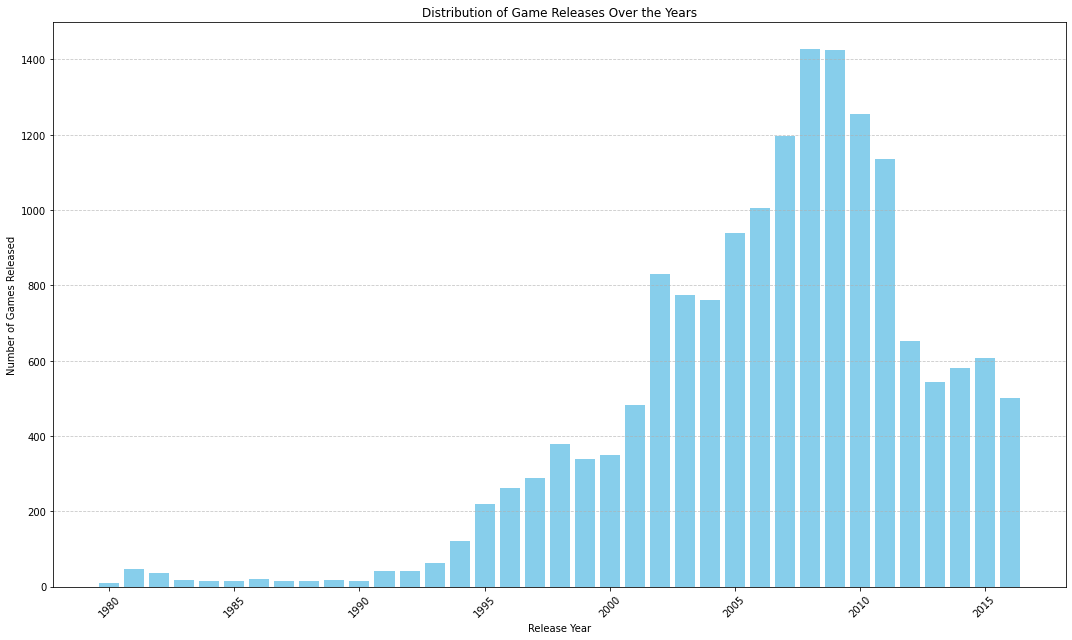

In [5]:
released_games = games.groupby('year_of_release').size()
plt.figure(figsize=(15, 9))
plt.bar(released_games.index, released_games.values, color='skyblue')
plt.xlabel('Release Year')
plt.ylabel('Number of Games Released')
plt.title('Distribution of Game Releases Over the Years')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Here we can see released games in spesific years. We can see there is a gaming bomb year of  2008-2009

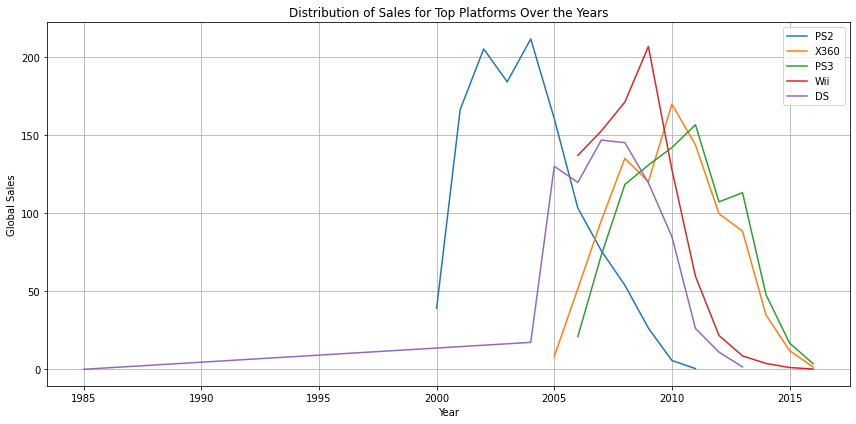

In [6]:
platform_s = games.groupby('platform')['total_sales'].sum() # Preparing data
top_platform = platform_s.nlargest(5) #Pulled the top 5 platform.


# Filter data for the chosen platforms
filtered_data = games[games['platform'].isin(top_platform.index)]

# Group filtered data by year
sales_per_year = filtered_data.groupby(['platform', 'year_of_release'])['total_sales'].sum()
sales_per_year
# Plot distribution of sales for each year
plt.figure(figsize=(12, 6))
for platform in top_platform.index:
    plt.plot(sales_per_year[platform].index, sales_per_year[platform].values, label=platform)

plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.title('Distribution of Sales for Top Platforms Over the Years')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify platforms with zero sales in recent years
zero_sales_platforms = sales_per_year.groupby('platform').filter(lambda x: x.iloc[-1] == 0).reset_index()

# Determine lifespan of platforms
platform_lifespan = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_lifespan['lifespan'] = platform_lifespan['max'] - platform_lifespan['min']

It took DS to get bigger sales almost 15 years. But after 2009 they started fading.
Also PS2, as soon as they realesed they sold so much machine, and after PS3 released they also started fading.

I am going to work with PS3 data from now on, that was one of my favorite consoles. 

## I did not understand whats asked for this question , however I will answer the way I understood. 
'Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a model for 2017.' There is no data after 2017, however i will look after 2014.



Q : Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.


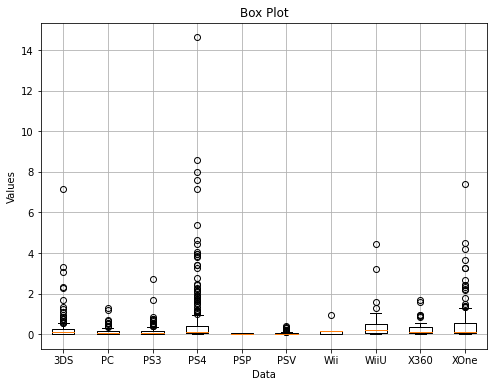

In [7]:
sales_for_2017 = games[games['year_of_release'] > 2014 ]

leading_sales = sales_for_2017.groupby('platform')['total_sales'].apply(list)


plt.figure(figsize=(8, 6))
plt.boxplot(leading_sales.values, labels=leading_sales.index)
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot')
plt.grid(True)
plt.show()
                      

If we look at above, clearly see that after 2014 PS4 has crashed the gaming world! 

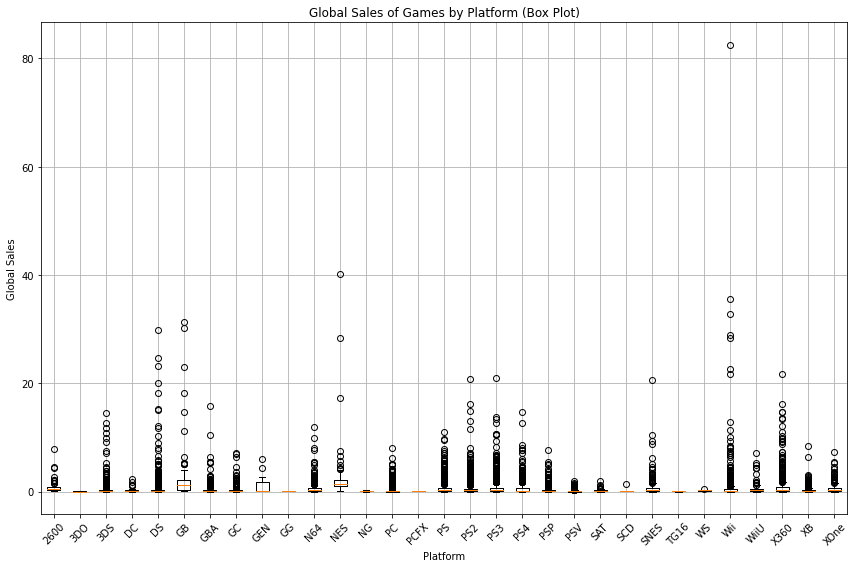

In [8]:
sales_by_platform = games.groupby('platform')['total_sales'].apply(list)

# Create a box plot for global sales broken down by platform
plt.figure(figsize=(12, 8))
plt.boxplot(sales_by_platform.values, labels=sales_by_platform.index)
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.title('Global Sales of Games by Platform (Box Plot)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Here above is the entire data of sales by platform in box plot.

# Lets take a close look at PS4 Data.

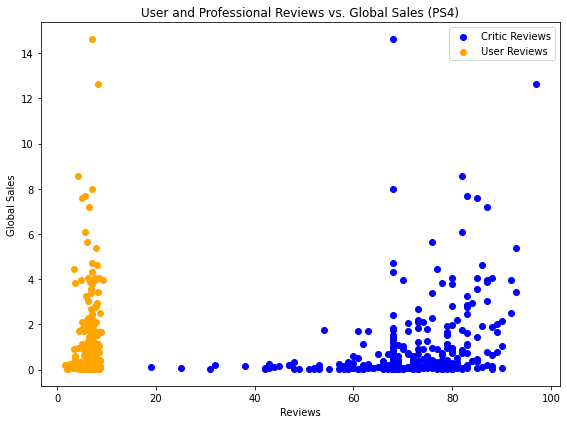

In [9]:
ps4_data = games[games['platform'] == 'PS4']

filtered_ps4 = ps4_data[['total_sales' , 'critic_score', 'user_score']]

filtered_ps4.dropna()

plt.figure(figsize=(8,6))
plt.scatter(filtered_ps4['critic_score'], filtered_ps4['total_sales'],color='blue', label='Critic Reviews')
plt.scatter(filtered_ps4['user_score'], filtered_ps4['total_sales'],color='orange', label='User Reviews')
plt.xlabel('Reviews')
plt.ylabel('Global Sales')
plt.title('User and Professional Reviews vs. Global Sales (PS4)')
plt.legend()
plt.tight_layout()
plt.show()

In [10]:
correlation =  filtered_ps4.corr()
correlation 


,total_sales,critic_score,user_score
total_sales,1.000000,0.352718,-0.045634
critic_score,0.352718,1.000000,0.502560
user_score,-0.045634,0.502560,1.000000


Doesnt seem to be users really cared about professionals reviews?? 

<Figure size 1440x792 with 0 Axes>

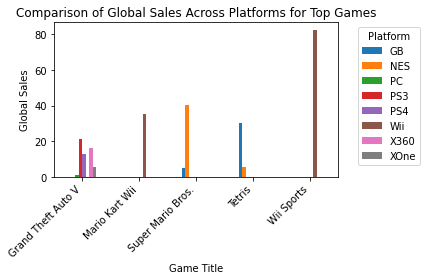

In [11]:
games_by_platform = games.groupby('name')
aggregated_sales = games_by_platform['total_sales'].sum()
aggregated_sales = aggregated_sales.sort_values(ascending=False)
top_games = aggregated_sales.head(5)

# Filter the original data to include only the top games
top_games_data = games[games['name'].isin(top_games.index)]

# Create a bar plot to compare sales across platforms for the top games
plt.figure(figsize=(20, 11))
top_games_data.groupby(['name', 'platform'])['total_sales'].sum().unstack().plot(kind='bar')
plt.xlabel('Game Title')
plt.ylabel('Global Sales')
plt.title('Comparison of Global Sales Across Platforms for Top Games')
plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

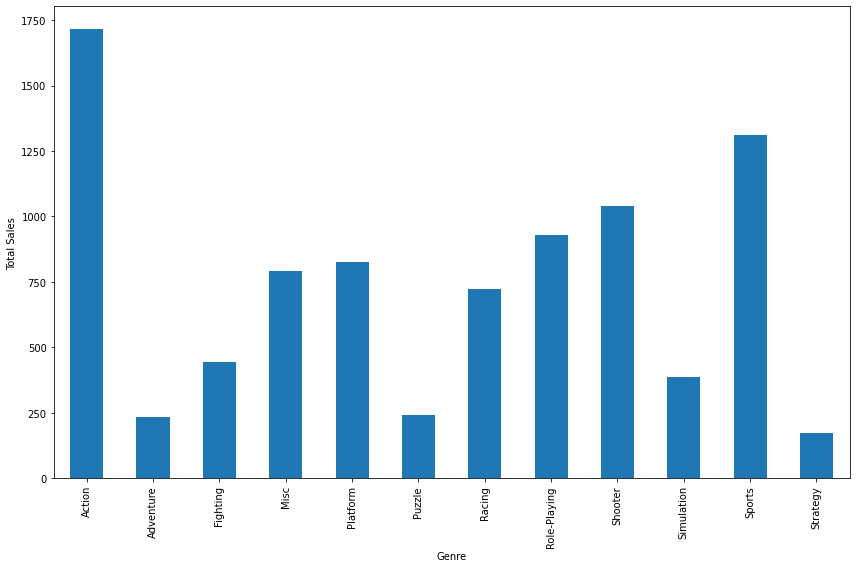

In [12]:
genre_c = games.groupby('genre')['total_sales']
plt.figure(figsize=(12, 8))
genre_c.sum().plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()


Regardless of what year, our data show us that Action games got the best profits according to our data. 
Data only includes years were given.

In [13]:
def profile(region):
    top_platforms = games.groupby('platform')[region].sum()
    top_platforms = top_platforms.nlargest(5)
    top_genres = games.groupby('genre')[region].sum()
    top_genres = top_genres.nlargest(5)
    return top_platforms , top_genres

na_sales_top_platforms = profile('na_sales')
eu_sales_top_platforms = profile('eu_sales')
jp_sales_top_platforms = profile('jp_sales')

print("Top Platforms in NA Sales:")
print(na_sales_top_platforms)
print("\nTop Platforms in EU Sales:")
print(eu_sales_top_platforms)
print("\nTop Platforms in JP Sales:")
print(jp_sales_top_platforms)




Top Platforms in NA Sales:
(platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64, genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64)

Top Platforms in EU Sales:
(platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64, genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64)

Top Platforms in JP Sales:
(platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64, genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64)


For each region (NA, EU, JP), determine:

The top five platforms. Describe variations in their market shares from region to region.
The top five genres. Explain the difference.
Do ESRB ratings affect sales in individual regions?

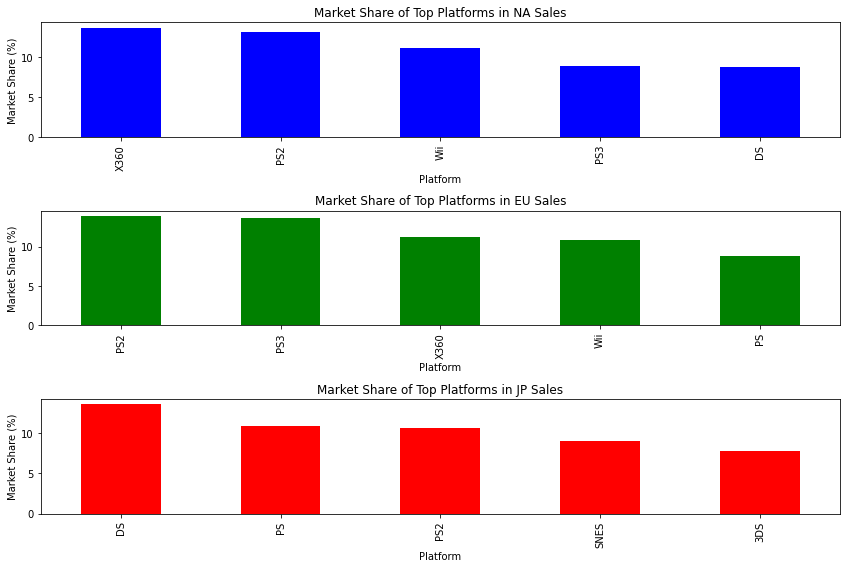

In [14]:
# Calculate total sales for each region
total_sales_na = games['na_sales'].sum()
total_sales_eu = games['eu_sales'].sum()
total_sales_jp = games['jp_sales'].sum()

# Calculate total sales for each platform within each region
total_sales_platforms_na = games.groupby('platform')['na_sales'].sum()
total_sales_platforms_eu = games.groupby('platform')['eu_sales'].sum()
total_sales_platforms_jp = games.groupby('platform')['jp_sales'].sum()

# Calculate market share of each platform within its region
market_share_platforms_na = (total_sales_platforms_na / total_sales_na) * 100
market_share_platforms_eu = (total_sales_platforms_eu / total_sales_eu) * 100
market_share_platforms_jp = (total_sales_platforms_jp / total_sales_jp) * 100

# Visualize market shares of the top platforms in each region
plt.figure(figsize=(12, 8))

# NA Sales 
plt.subplot(3, 1, 1)
market_share_platforms_na.nlargest(5).plot(kind='bar', color='b')
plt.title('Market Share of Top Platforms in NA Sales')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')

# EU Sales
plt.subplot(3, 1, 2)
market_share_platforms_eu.nlargest(5).plot(kind='bar', color='g')
plt.title('Market Share of Top Platforms in EU Sales')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')

# JP Sales
plt.subplot(3, 1, 3)
market_share_platforms_jp.nlargest(5).plot(kind='bar', color='r')
plt.title('Market Share of Top Platforms in JP Sales')
plt.xlabel('Platform')
plt.ylabel('Market Share (%)')

plt.tight_layout()
plt.show()

In [18]:
xbox_ratings = games[games['platform'] == 'Xbox One']['user_score']
pc_ratings = games[games['platform'] == 'PC']['user_score']

t_statistic, p_value = ttest_ind(xbox_ratings.dropna(), pc_ratings.dropna(), equal_var=False)

# Print results
print("Test Statistic:", t_statistic)
print("P-value:", p_value)

# Compare p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Average user ratings of Xbox One and PC platforms are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings of Xbox One and PC platforms are the same.")

Test Statistic: nan
P-value: nan
Fail to reject the null hypothesis: Average user ratings of Xbox One and PC platforms are the same.


The null hypothesis (H0) assumes that there is no difference in the average user ratings between the Xbox One and PC platforms. The alternative hypothesis (H1) states that there is a difference in the average user ratings between the two platforms.



In [23]:
action_ratings = games[games['genre'] == 'Action']['user_score']
sports_ratings = games[games['genre'] == 'Sports']['user_score']

t_statistic1, p_value1 = ttest_ind(action_ratings.dropna(), sports_ratings.dropna(), equal_var=False)
# Print results
print("Test Statistic:", t_statistic1)
print("P-value:", p_value1)

alpha = 0.05
if p_value1 < alpha:
    print("Reject the null hypothesis: Average user ratings of Action genre and sports genre are different.")
else:
    print("Fail to reject the null hypothesis: Average user ratings of Action Genre and Sports genre are the same.")

Test Statistic: 1.5149154115534325
P-value: 0.12986002868003144
Fail to reject the null hypothesis: Average user ratings of Action Genre and Sports genre are the same.


The null hypothesis (H0) assumes that there is no difference in the average user ratings between the Action genre and sports genre. The alternative hypothesis (H1) states that there is a difference in the average user ratings between the two platforms.

